In [1]:
import pandas as pd
import numpy as np
import random
p1=pd.read_excel('output_zillow.xlsx',sheet_name=0)
p1

p1.head(5)

,Unnamed: 0,street,city,zip_code,address,price,bds,ba,sqft,links,...,Annual tax amount,HOA AMENITIES.1,POOL,HOA Fees Freq,STYLE,List Date,WATER/SEWER,Class,View description,LOT DESCRIPTION
0,1,40400 Canyon Heights Dr,Fremont,CA 94539,"40400 Canyon Heights Dr, Fremont, CA 94539",2520000,5,3.0,3535,https://www.zillow.com/homedetails/40400-Canyo...,...,25117,None,In Ground Spa Hot Tub Pool Sweep,None,Contemporary,2020-02-14,Sewer System - Public Water - Public,RESIDENTIAL,City Mountain Park Territorial,Other Up Slope Premium Lot
1,2,104 Lena Ct,Pleasant Hill,CA 94523,"104 Lena Ct, Pleasant Hill, CA 94523",1200000,4,3.0,2832,https://www.zillow.com/homedetails/104-Lena-Ct...,...,10934,None,None,None,None,None,None,None,Partial Mt Diablo,None
2,3,3706 Angus Way,Pleasanton,CA 94588,"3706 Angus Way, Pleasanton, CA 94588",990000,3,2.0,1309,https://www.zillow.com/homedetails/3706-Angus-...,...,8494,None,None,None,Contemporary,2020-02-06,Sewer System - Public Water - Public,RESIDENTIAL,Territorial,Corner
3,4,2070 47th Ave,San Francisco,CA 94116,"2070 47th Ave, San Francisco, CA 94116",1250000,2,1.0,1000,https://www.zillow.com/homedetails/2070-47th-A...,...,1781,None,None,None,None,None,None,None,None,None
4,5,5004 Westside Dr,San Ramon,CA 94583,"5004 Westside Dr, San Ramon, CA 94583",1740000,5,4.0,4196,https://www.zillow.com/homedetails/5004-Westsi...,...,18816,None,None,None,Mediterranean,2020-02-05,Sewer System - Public Water - Public,RESIDENTIAL,City Territorial,Premium Lot


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot('price','Zestimate',data=p1)
plt.title('Zestimate versus Price')
plt.xticks(rotation=90)
plt.show()



<Figure size 640x480 with 1 Axes>

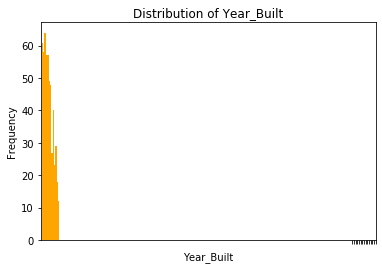

In [3]:
x=p1['Year_Built']

num_bins = 13
plt.hist(x, num_bins, color="orange" )

plt.xticks(np.arange(1880, 2030, step=10),rotation=45)

plt.xlabel('Year_Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year_Built')

plt.show()

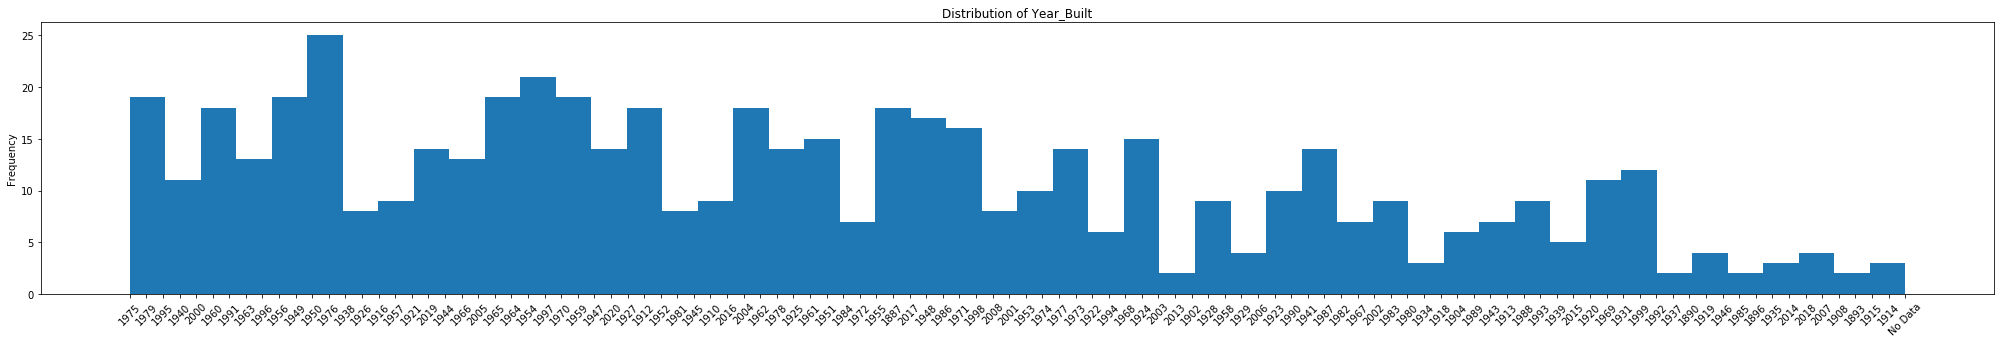

In [4]:
x=p1['Year_Built']
plt.figure(figsize=(35,5))
num_bins = 50
plt.hist(x, num_bins)

plt.xticks(rotation=45)

#plt.xlabel('Year_Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year_Built')

plt.show()

(-1.1000878677282024,
 1.1000041842336905,
 -1.1000430969381112,
 1.10013794885238)

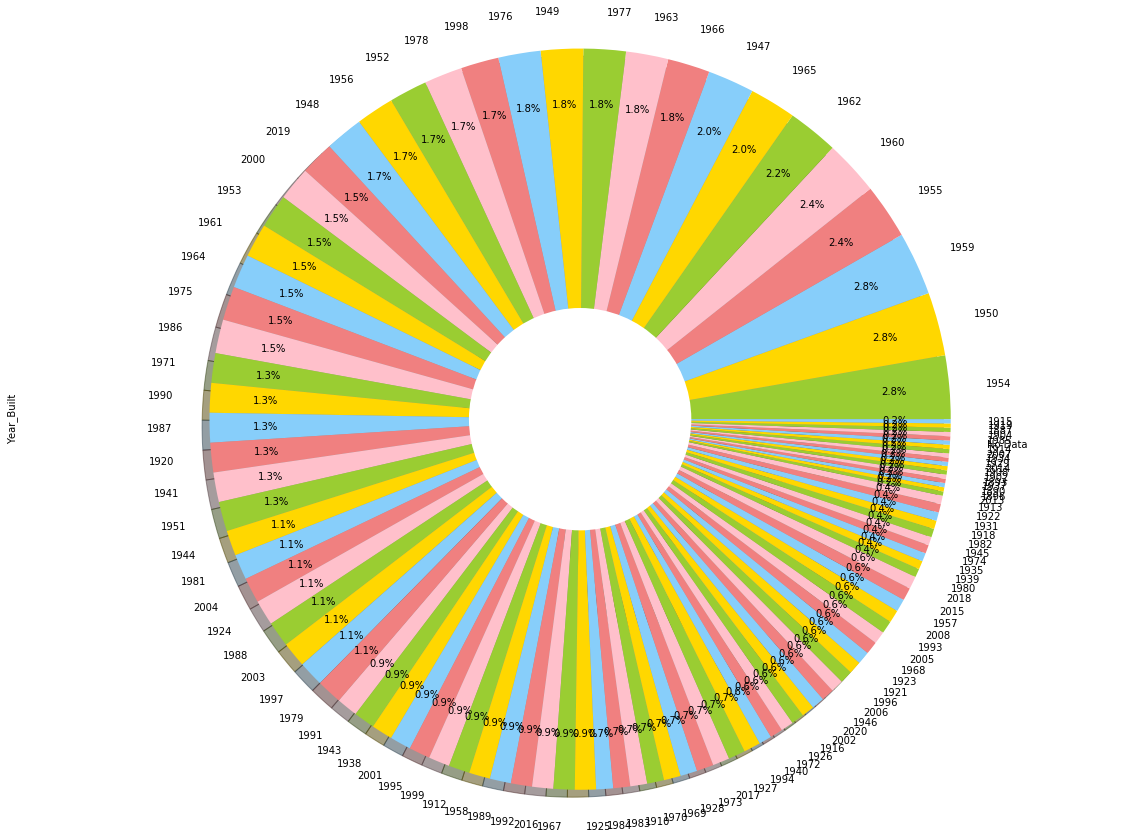

In [5]:
a=p1["Year_Built"].value_counts()
b= pd.DataFrame(a)
c=b.head(5)

plot = a.plot.pie(subplots=True,colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','pink'],figsize=(20, 15),autopct='%1.1f%%',pctdistance=0.85,shadow=True)
#plt.legend(title="Year Built",loc='upper left')
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')


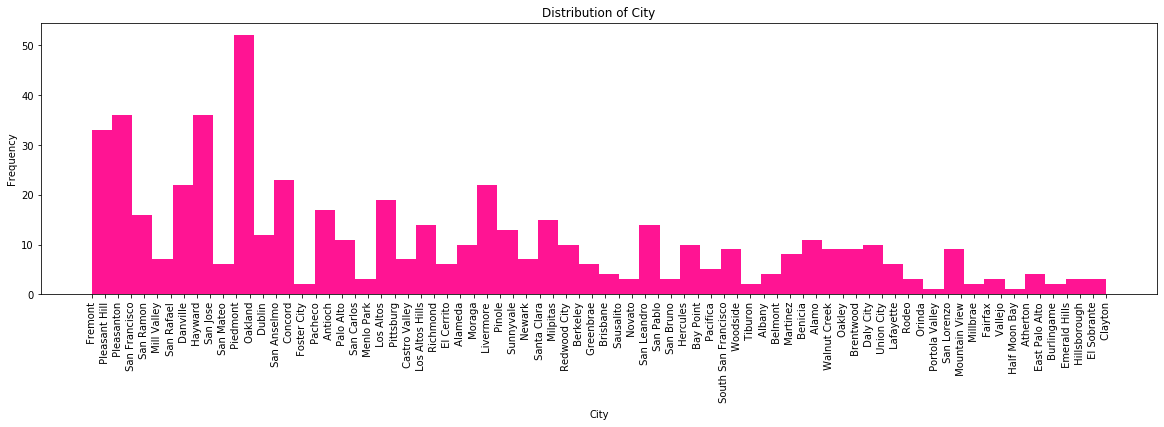

In [7]:
x1=p1['city']
plt.figure(figsize=(20,5))
num_bins = 50

plt.hist(x1, num_bins, facecolor='deeppink')

plt.xticks(rotation=90)

plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Distribution of City')

plt.show()


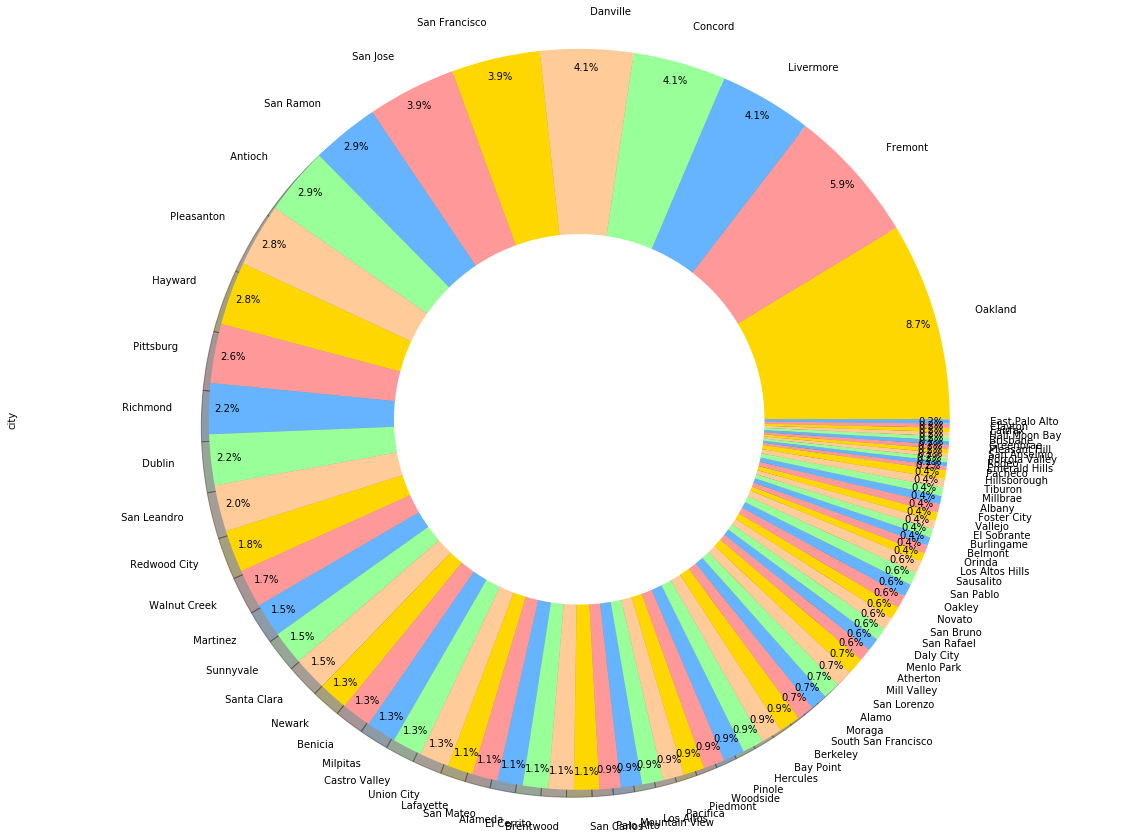

In [8]:
a=p1["city"].value_counts()
b= pd.DataFrame(a)
c=b.head(6)

colors=['gold','#ff9999','#66b3ff','#99ff99','#ffcc99']

plot = a.plot.pie(subplots=True,colors=colors,shadow=True, figsize=(20, 15),pctdistance=0.95,autopct='%1.1f%%')
#plt.legend(title="CITY",loc='center')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.show()

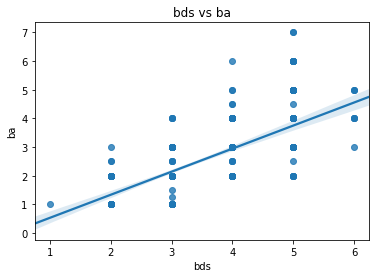

In [9]:
sns.regplot('bds','ba',data=p1)
plt.title('bds vs ba')
plt.show()


No handles with labels found to put in legend.


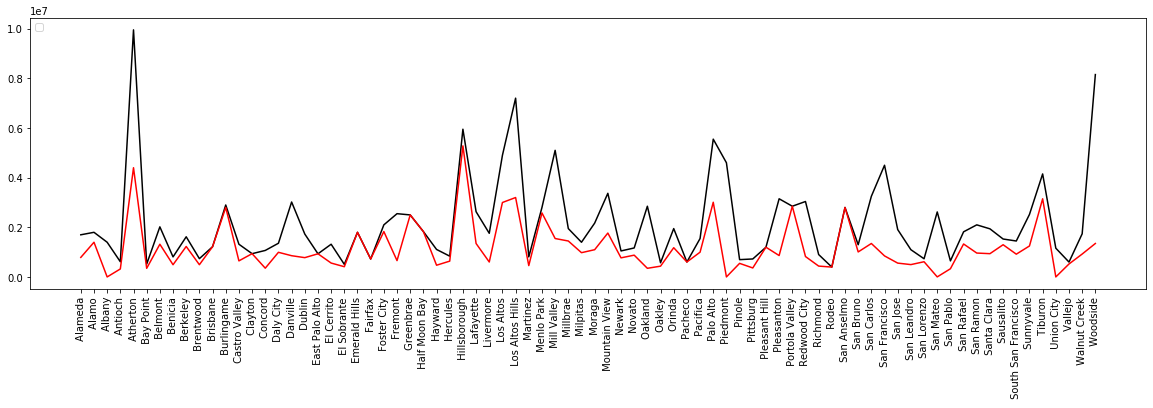

In [10]:
maxcity=p1.groupby(['city']).max()
y = maxcity["price"]
y1=y.reset_index()
#y1
mincity=p1.groupby(['city']).min()
#mincity
z = mincity["price"]
z1=z.reset_index()
#z1
x1=y1["city"]
x1

x=y1['city']

plt.figure(figsize=(20,5))
#plt.stackplot(x1,y1, labels=['MAX Price'],colors='#34495e')
#plt.stackplot(x1,z1, labels=['Min Price'],colors='pink')
plt.plot(x1, y, 'black') 
plt.plot(x1, z, 'red')

plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

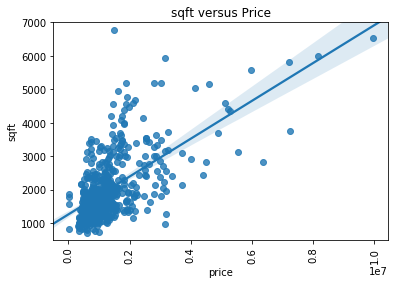

In [11]:
sns.regplot('price','sqft',data=p1)
plt.title('sqft versus Price')
plt.xticks(rotation=90)
plt.ylim(500,7000)
plt.show()

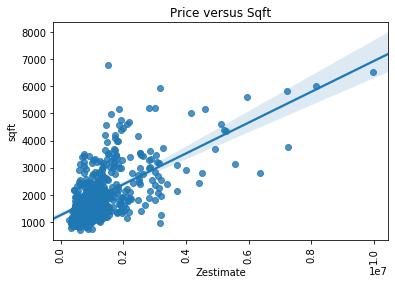

In [12]:
sns.regplot('Zestimate','sqft',data=p1)
plt.title('Price versus Sqft')
plt.xticks(rotation=90)
plt.show()

No handles with labels found to put in legend.


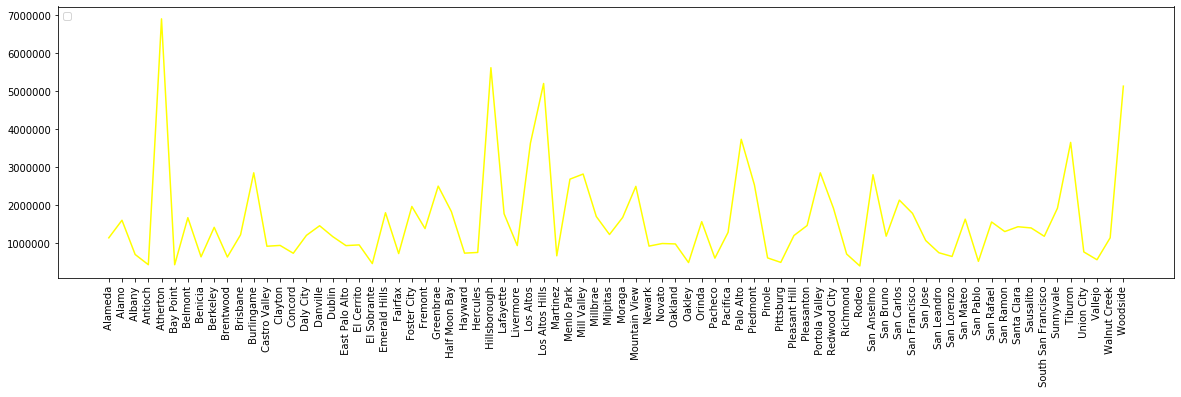

In [13]:
meancity=p1.groupby(['city']).mean()
meancity
m1 = meancity["price"]
m1
y1=m1.reset_index()
y1
x1=y1["city"]
x1
y2=y1["price"]

plt.figure(figsize=(20,5))
#plt.stackplot(x1,y2, labels=['Mean Price'],colors='yellow')
plt.plot(x1, y2, 'yellow') 
plt.xticks(rotation=90)
plt.legend(loc='upper left')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
DF=pd.read_excel('output_zillow.xlsx')# Sheet name matches exactly the sheet that we want to open. 
DF


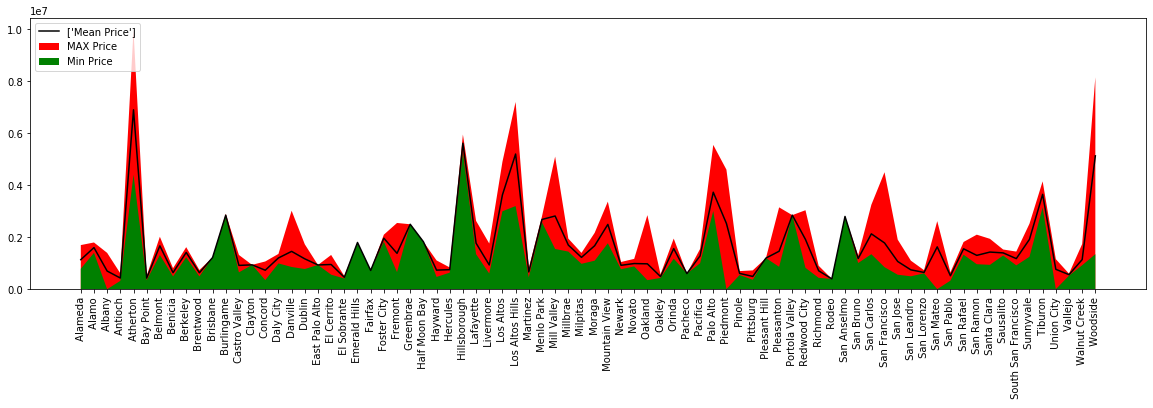

In [14]:
x1=y1["city"]
x1

maxcity=p1.groupby(['city']).max()
y = maxcity["price"]
y1=y.reset_index()
#y1



mincity=p1.groupby(['city']).min()
#mincity
z = mincity["price"]
z1=z.reset_index()
#z1


meancity=p1.groupby(['city']).mean()
meancity
m1 = meancity["price"]
m1
y2=m1.reset_index()
y2=y2["price"]


plt.figure(figsize=(20,5))
plt.stackplot(x1,y, labels=['MAX Price'],colors='red')
#plt.stackplot(x1,y2, labels=['Mean Price'],colors='yellow')
plt.stackplot(x1,z, labels=['Min Price'],colors='green')


#plt.plot(x1, y, 'red',label=['MAX Price']) 
#plt.plot(x1, z, 'green',label=['Min Price'])
plt.plot(x1, y2, 'black',label=['Mean Price'])


plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

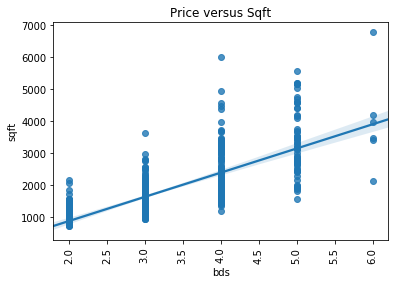

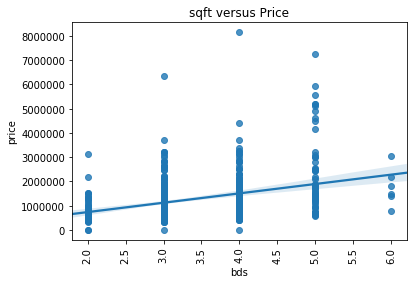

In [559]:
sns.regplot('bds','price',data=p1)
plt.title('sqft versus Price')
plt.xticks(rotation=90)
plt.show()